# Image Caption Generator

# 
- Author : Nithesh Kumar MANIMARAN
- Date : 2023-02-11


# Introduction

The project is focused on generating captions for an input image. The goal is to automatically generate a textual description that accurately represents the content of an image. This task is known as image captioning and has various applications such as web accessibility, photo organization and retrieval, and intelligent personal assistants.

In this project, we will be using the VGG16 model which is a deep convolutional neural network to extract features from the input image. The extracted features will then be fed into a recurrent neural network that will generate a caption for the input image. The recurrent neural network will consist of two parts, an encoder and a decoder. The encoder will encode the image features into a compact representation, and the decoder will use the compact representation to generate a caption.

The dataset used in this project consists of a collection of images and their corresponding captions. The images will be preprocessed and the captions will be tokenized and preprocessed to prepare them for the training of the recurrent neural network.

In conclusion, the project aims to demonstrate the application of deep learning models to generate captions for an input image. The final model will take an image as an input and generate a textual description that represents the content of the image.

# Dataset Loading
The dataset used for this project contains images and their corresponding captions. The images are loaded using the load_img function from the keras.preprocessing.image module. The captions are loaded from a text file and stored in a dictionary where each key represents an image ID and its values are lists of captions for that image.

# Preprocessing
The images are preprocessed to be fed into the VGG16 model. They are resized to (224,224) and converted to arrays using the img_to_array function. The arrays are then expanded to include an extra dimension and preprocessed using the preprocess_input function to prepare the images for feature extraction.

The captions are also preprocessed to prepare them for training the caption generation model. They are lowercased, cleaned, and tokenized. The tokenization is performed using the Tokenizer class from the keras.preprocessing.text module. The vocabulary size and maximum length of the captions are calculated for later use in training the model.

# Modelisation
The image feature extraction is performed using the VGG16 architecture. The last layer of the VGG16 model is removed, and a new model is created that outputs the features from the penultimate layer of the VGG16 model.

The caption generation model is a combination of LSTM and dense layers. It takes two inputs, one for the image features and one for the previous word in the caption. The LSTM layer is responsible for generating the next word in the caption based on the previous words and the image features. The dense layer is used to make the final prediction for the next word.

# Inference
The caption generation model is used for inference by feeding in an image and using the generated captions as input to generate the next word in the caption. This process is repeated until the end of the caption is reached, indicated by the "endseq" token. The generated captions are then postprocessed to remove any additional padding or special tokens added during training.

# 

In depth explanations

In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

The code imports several libraries necessary for building a deep learning model for image classification.

numpy: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

pandas: Pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and data manipulation library built on top of the Python programming language.

os: The os module provides a way of using operating system dependent functionality like reading or writing to the file system.

VGG16: This is a pre-trained deep neural network model for image classification, developed by the Visual Geometry Group at the University of Oxford.

preprocess_input: This function is used to preprocess input data for the VGG16 model, converting the image data to the format expected by the model.

Model: This is a Keras class for creating a model, which can be used for training and evaluating the model.

load_img: This function is used to load an image from a file and convert it to a NumPy array.

img_to_array: This function is used to convert a PIL image instance to a NumPy array, which can be used as input to the deep learning model.

In [2]:
vgg_model = VGG16()
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

The code is initializing a pre-trained VGG16 model, a deep neural network architecture for image classification. The VGG16 model is loaded from the "tensorflow.keras.applications.vgg16" module, which includes pre-trained weights on a large image dataset.

The code then creates a new model using the VGG16 model, with the inputs and outputs specified. The outputs of the VGG16 model are set to be the output of the penultimate (second-to-last) layer of the VGG16 model.

Finally, the summary of the new model is printed, which provides information about the layers, number of parameters, and shapes of the inputs and outputs of the model.

In [ ]:
features = {}
img_files = os.listdir('/content/drive/MyDrive/Computer vision/Dataset/Images')

for img_name in img_files:
    img_path = '/content/drive/MyDrive/Computer vision/Dataset/Images/' + img_name
    img = load_img(img_path, target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    feature = vgg_model.predict(img, verbose=0)
    img_id = img_name.split('.')[0]
    features[img_id] = feature

This code is extracting features from images using a pre-trained VGG16 model. It's first loading the VGG16 model and modifying it to only keep the last layer before the fully connected layers. The last layer of the VGG16 model is usually used as a feature extractor, as it contains high-level features learned from the image dataset used to train the model.

Then, it lists all the image files in the directory specified by img_files and extracts features for each image by:

Loading the image using the load_img function and resizing it to a target size of (224,224). This is the standard input size for the VGG16 model.
Converting the image to an array using the img_to_array function.
Adding an extra dimension to the image array using np.expand_dims to make it 4-dimensional. This is necessary for inputting into the VGG16 model.
Pre-processing the image using the preprocess_input function to align the input with the pre-processing used during training of the VGG16 model.
Predicting the features from the model using the predict function.
Storing the extracted features in a dictionary, where the keys are the image IDs, which are obtained by removing the file extension from the image names.


In [3]:
with open(os.path.join('/content/drive/MyDrive/Computer vision/Dataset/captions.txt'), 'r') as f:
    next(f)
    cptns_doc = f.read()

Reading all the captions from the captions file and storing them in a dictionary, where the keys are the image IDs and the values are lists of captions for that image.

In [4]:
img_cap_dict = {}

for line in cptns_doc.split('\n'):
    tokens = line.split(',')
    img_id, cptns = tokens[0], tokens[1:]
    img_id = img_id.split('.')[0]
    cptns = " ".join(cptns)
    if img_id not in img_cap_dict:
        img_cap_dict[img_id] = []
    img_cap_dict[img_id].append(cptns)

for key, cptns in img_cap_dict.items():
    for i in range(len(cptns)):
        caption = cptns[i]
        caption = caption.lower()
        caption = caption.replace('[^A-Za-z]', '')
        caption = caption.replace('\s+', ' ')
        caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
        cptns[i] = caption

This code is preprocessing the captions for each image in the dataset. It reads the captions from the file "captions.txt" and stores them in the dictionary "img_cap_dict". Each key in the dictionary is the image id and the value is a list of captions for the corresponding image.

In the next step, the captions are being converted to lowercase and any special characters or numbers are removed. The captions are then surrounded by the start and end sequence markers 'startseq' and 'endseq' to indicate the start and end of a caption.

This preprocessing step is important to ensure that the captions are in a consistent format for training the model.

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
import pickle

all_cptns = []
for key in img_cap_dict:
    for cptn in img_cap_dict[key]:
        all_cptns.append(cptn)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_cptns)
vocab_size = len(tokenizer.word_index) + 1
max_len = max(len(cptn.split()) for cptn in all_cptns)
print("vocab size: ", vocab_size, "\nmax len of captions: ", max_len)

# save the tokenizer as h5 file for later use

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


vocab size:  8485 
max len of captions:  35


This code block performs some preprocessing steps for the captions data. Firstly, it combines all captions into a single list "all_cptns".

Next, it creates a Tokenizer object, which is a tool to extract tokens from the text data, i.e. words in this case, and convert them into numerical values (integers) which can be used as input to the neural network. It fits the tokenizer on the list of captions "all_cptns".

The variable "vocab_size" is then calculated as the number of unique words in the captions (word_index) plus 1 (to account for index 0).

The maximum length of the captions is also calculated using the function max() and stored in the variable "max_len".

Finally, it prints out the vocabulary size and maximum length of captions.

In [ ]:
def data_generator(data_keys, img_cap_dict, features, tokenizer, max_len, vocab_size, batch_size):
    x1, x2, y = [], [], []
    n = 0
    while True:
        for key in data_keys:
            n += 1
            cptns = img_cap_dict[key]
            for cptn in cptns:
                seq = tokenizer.texts_to_sequences([cptn])[0]
                for i in range(len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_len)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    x1.append(features[key][0])
                    x2.append(in_seq)
                    y.append(out_seq)
                
            if n == batch_size:
                x1, x2, y = np.array(x1), np.array(x2), np.array(y)
                yield [x1,x2], y
                x1, x2, y = [], [], []
                n = 0 

This function is a data generator for training a caption generator model. It takes several arguments as inputs:

data_keys: the keys of the images in the dataset
img_cap_dict: a dictionary mapping image IDs to captions
features: a dictionary mapping image IDs to image features extracted using a pre-trained image classification model
tokenizer: a Keras Tokenizer object that has been fit on the captions in the dataset
max_len: the maximum length of the captions in the dataset
vocab_size: the size of the vocabulary of the captions in the dataset
batch_size: the batch size to use for training the model
The function generates data for training by looping over the data_keys, for each image ID it retrieves the associated captions, converts each caption to sequences of integers using the tokenizer, and converts each integer to a one-hot encoded representation using to_categorical. The input to the model consists of two parts: the image features and the input sequence, which is a padded version of the one-hot encoded caption. The target output is the one-hot encoded next word in the caption. The function returns a generator that yields batches of data in the form of ([x1, x2], y) where x1 is the image features, x2 is the input sequence, and y is the target output.

In [ ]:
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

input1 = Input(shape=(4096,))
l1 = Dropout(0.1)(input1)
l2 = Dense(1024, activation='relu')(l1)

input2 = Input(shape=(max_len,))
l3 = Embedding(vocab_size, 256, mask_zero=True)(input2)
l4 = Dropout(0.1)(l3)
l5 = LSTM(1024)(l4)

dcdr1 = add([l2,l5])
dcdr2 = Dense(1024, activation='relu')(dcdr1)
output = Dense(vocab_size, activation = 'softmax')(dcdr2)

model = Model(inputs=[input1,input2], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam')

The first input layer input1 has shape (4096,) and is the feature vector of an image obtained from a pre-trained model. The layer l1 is a Dropout layer with a dropout rate of 0.1, which helps to prevent overfitting. Then, the feature vector is passed through a Dense layer l2 with 1024 neurons and ReLU activation function.

The second input layer input2 has shape (max_len,), which is the length of the longest caption in the data, and is the partial caption that the model is expected to complete. The layer l3 is an Embedding layer with a vocabulary size of vocab_size, 256-dimensional embedding space and masking zero values. The layer l4 is another Dropout layer with a dropout rate of 0.1. The partial caption is then passed through an LSTM layer l5 with 1024 neurons.

Then, the outputs of the two branches are combined using the add layer. The combined layer is then passed through a Dense layer dcdr2 with 1024 neurons and ReLU activation function. Finally, the output layer output is a Dense layer with vocab_size neurons and a softmax activation function. The model is compiled using the categorical cross-entropy loss and the Adam optimizer.

In [ ]:
def train(data, epochs, batch_size):
    steps = len(data) // batch_size
    for i in range(epochs):
        generator = data_generator(data, img_cap_dict, features, tokenizer, max_len, vocab_size, batch_size)
        model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

Train function to train the above model

In [ ]:
img_ids = list(img_cap_dict.keys())
train_data = img_ids[:int(len(img_ids) * 0.8)]
test_data = img_ids[int(len(img_ids) * 0.8):]

train(train_data, epochs=10, batch_size=64)

101/101 [==============================] - 133s 1s/step - loss: 2.1415


Model training is performed. And the model is saved in the file "model.h5".


In [ ]:
model.save('model.h5')

In [ ]:
def idx_to_word(intgr, tokenizer):
    for word, idx in tokenizer.word_index.items():
        if idx == intgr:
            return word
    return None

This function idx_to_word takes an integer intgr as input and a tokenizer, and returns the word corresponding to the index intgr in the tokenizer's word_index dictionary.

The function iterates over the items in the word_index dictionary of the tokenizer, checking if the index idx matches the input integer intgr. If it matches, the corresponding word is returned. If no match is found, the function returns None.

In [ ]:
def predict_captions(model, image, tokenizer, max_len):
    in_text = 'startseq'
    for i in range(max_len):
        seq = tokenizer.texts_to_sequences([in_text])[0]
        seq = pad_sequences([seq], max_len)
        prd = model.predict([image, seq], verbose=0)
        prd = np.argmax(prd)
        word = idx_to_word(prd, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
    return in_text

This function takes the trained caption generation model, an image, the tokenizer used to encode captions, and the maximum length of the captions as inputs. The function starts with a dummy "startseq" string and generates a sequence of words iteratively by encoding the current sequence of words, passing it as input to the model, obtaining the predicted next word, appending it to the current sequence of words, and repeating the process. The loop continues until the maximum length is reached or the word "endseq" is generated. The final sequence of words is returned as the generated caption.

# Inference

------------------real captions------------------

['startseq one climber is sitting on the rock overlooking the ocean whilst another climber is on her way up endseq', 'startseq two people are on rock overlooking the ocean endseq', 'startseq two people climb rock overhanging water endseq', 'startseq two people climb rocks over some water endseq', 'startseq two people rock climbing near water endseq']
------------------pred captions------------------

startseq man is standing on the edge of the ocean endseq


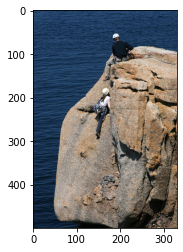

In [ ]:
import cv2
import matplotlib.pyplot as plt

rndm_idx = np.random.randint(0, len(test_data))
test_img_id = test_data[rndm_idx]
captions = img_cap_dict[test_img_id]
y_prd = predict_captions(model, features[test_img_id], tokenizer, max_len) 
img = cv2.imread('/content/drive/MyDrive/Computer vision/Dataset/Images/' + test_img_id + '.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print("------------------real captions------------------\n")
print(captions)
print("------------------pred captions------------------\n")
print(y_prd)

------------------real captions------------------

['startseq brown dog and black dog are foraging in some brush-land endseq', 'startseq light brown dog and black and brown dog are in some dry brush endseq', 'startseq yellow and black dog looking in the same direction standing in some brush endseq', 'startseq one tan dog with stick and one mostly black dog endseq', 'startseq two dogs playing outside endseq']
------------------pred captions------------------

startseq two dogs fight on the green bed endseq


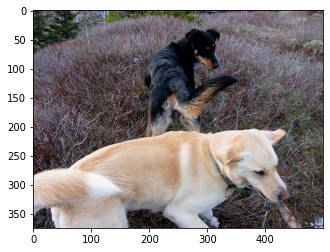

In [ ]:
import cv2
import matplotlib.pyplot as plt

rndm_idx = np.random.randint(0, len(test_data))
test_img_id = test_data[rndm_idx]
captions = img_cap_dict[test_img_id]
y_prd = predict_captions(model, features[test_img_id], tokenizer, max_len) 
img = cv2.imread('/content/drive/MyDrive/Computer vision/Dataset/Images/' + test_img_id + '.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print("------------------real captions------------------\n")
print(captions)
print("------------------pred captions------------------\n")
print(y_prd)

------------------real captions------------------

['startseq blonde toddler in light green shirt sitting in green chair surrounded by other green chairs endseq', 'startseq cute toddler girl waits in her stroller endseq', 'startseq little blonde girl is sitting on green chair endseq', 'startseq little girl is turned around in her seat at an event endseq', 'startseq young girl with blond hair holding onto rail endseq']
------------------pred captions------------------

startseq young girl in green jacket laughs endseq


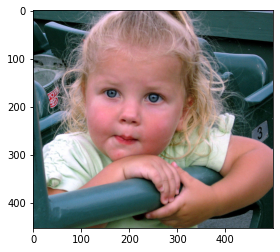

In [ ]:
import cv2
import matplotlib.pyplot as plt

rndm_idx = np.random.randint(0, len(test_data))
test_img_id = test_data[rndm_idx]
captions = img_cap_dict[test_img_id]
y_prd = predict_captions(model, features[test_img_id], tokenizer, max_len) 
img = cv2.imread('/content/drive/MyDrive/Computer vision/Dataset/Images/' + test_img_id + '.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print("------------------real captions------------------\n")
print(captions)
print("------------------pred captions------------------\n")
print(y_prd)

------------------real captions------------------

['startseq brown and brown dog are running endseq', 'startseq two dogs running in the dirt endseq', 'startseq two dogs running over packed dirt and rocks endseq', 'startseq two dogs run through mud endseq', 'startseq two large dogs run along muddy path endseq']
------------------pred captions------------------

startseq dog is running on the beach endseq


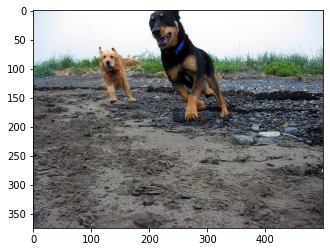

In [ ]:
import cv2
import matplotlib.pyplot as plt

rndm_idx = np.random.randint(0, len(test_data))
test_img_id = test_data[rndm_idx]
captions = img_cap_dict[test_img_id]
y_prd = predict_captions(model, features[test_img_id], tokenizer, max_len) 
img = cv2.imread('/content/drive/MyDrive/Computer vision/Dataset/Images/' + test_img_id + '.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print("------------------real captions------------------\n")
print(captions)
print("------------------pred captions------------------\n")
print(y_prd)

------------------real captions------------------

['startseq girl in pink top is swinging with her hair flying everywhere endseq', 'startseq girl is swinging endseq', 'startseq girl is swinging and looking down with her hair flying endseq', "startseq girl 's hair streams behind her as she swings endseq", 'startseq girl with long hair flying in the breeze while she swings endseq']
------------------pred captions------------------

startseq girl in red coat is flying through the air endseq


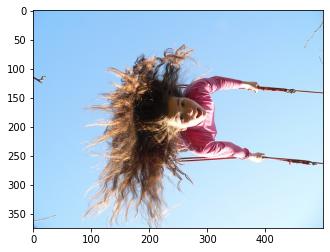

In [ ]:
import cv2
import matplotlib.pyplot as plt

rndm_idx = np.random.randint(0, len(test_data))
test_img_id = test_data[rndm_idx]
captions = img_cap_dict[test_img_id]
y_prd = predict_captions(model, features[test_img_id], tokenizer, max_len) 
img = cv2.imread('/content/drive/MyDrive/Computer vision/Dataset/Images/' + test_img_id + '.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print("------------------real captions------------------\n")
print(captions)
print("------------------pred captions------------------\n")
print(y_prd)